In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r"C:\Users\toloz\Instacart Basket Analysis 9_11_2024"

In [5]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'aggr_ords_prods_merge_deri.pkl'))

In [13]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,two slowest days,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,two slowest days,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,two slowest days,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,two slowest days,Most orders,10,New customer,6.367797,Low_spender,20.0,Regular customer


<Axes: xlabel='order_dow'>

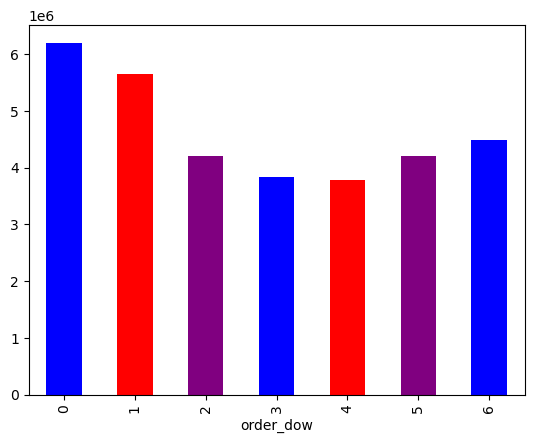

In [31]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color = ["blue","red","purple"])

<Axes: xlabel='order_hour_of_day'>

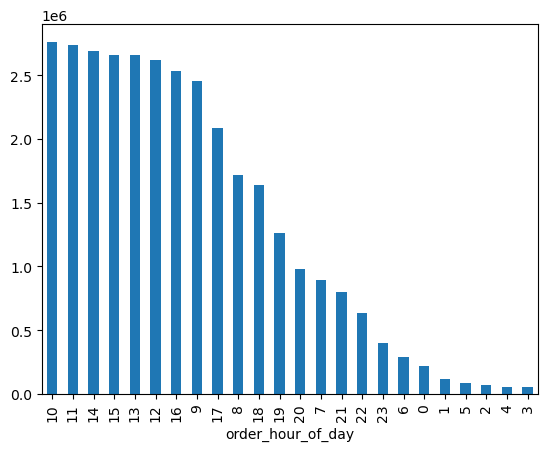

In [17]:
ords_prods_merge['order_hour_of_day'].value_counts().plot.bar()

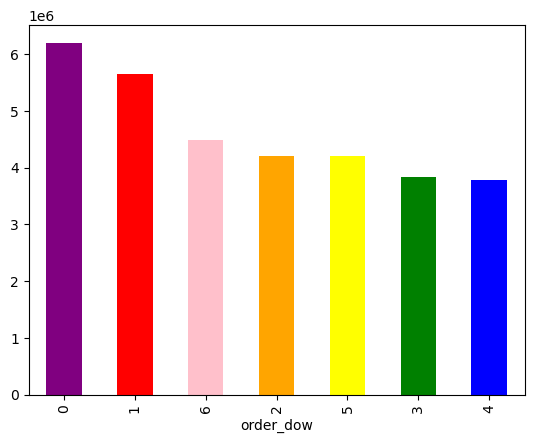

In [37]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [41]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

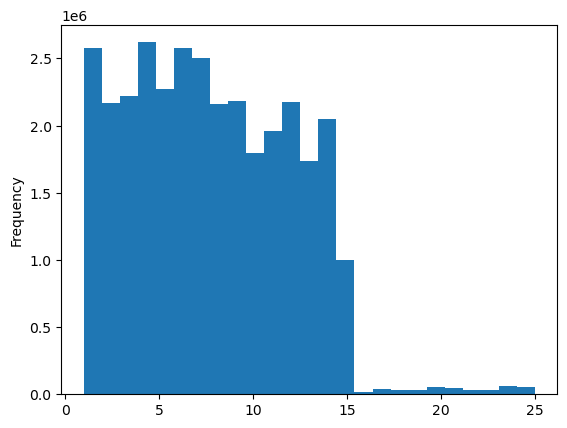

In [53]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

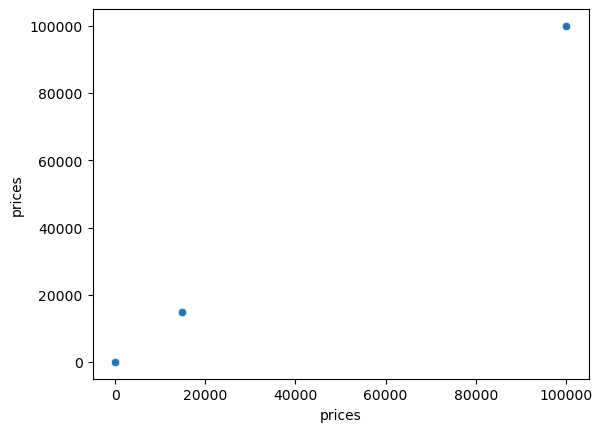

In [45]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [46]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High_spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High_spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,High-range product,Regularly busy,two slowest days,Most orders,15,Regular customer,451.153540,High_spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,High-range product,Regularly busy,two slowest days,Average orders,12,Regular customer,1178.381871,High_spender,7.0,Frequent Customer


In [49]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [51]:
ords_prods_merge['prices'].max()

25.0

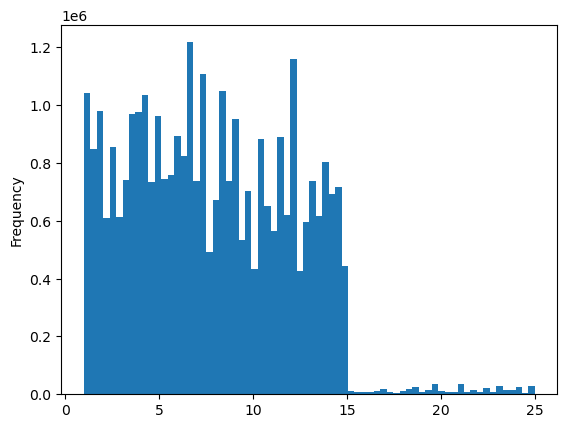

In [57]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [59]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'hist_orders_prices.png'))

In [67]:
np.random.seed(4)
#Create a list holding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [69]:
#Store 70% of the sample
big = ords_prods_merge[dev]

In [70]:
#store 30% of the sample
small = ords_prods_merge[~dev]

In [77]:
df_2 = small[['order_dow','prices']]

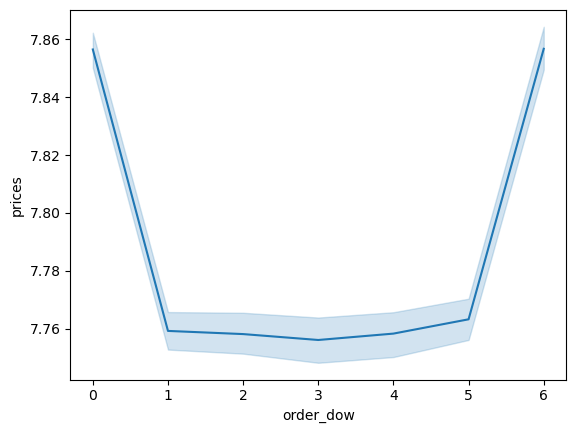

In [81]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')